In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from konlpy.tag import Hannanum
from konlpy.tag import Okt
from konlpy.tag import Komoran
import sqlite3 as sq3
from pandas.io import sql
import os
import numpy as np
import math
import seaborn as sns

In [2]:
from matplotlib import font_manager, rc # 폰트 세팅을 위한 모듈 추가
font_path = "C:/Windows/Fonts/malgun.ttf" # 사용할 폰트명 경로 삽입
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

## read db file

In [3]:
# 데이터베이스 저장
def db_save(data, db_name, table_name):
    with sq3.connect(os.path.join('.',db_name)) as con: # sqlite DB 파일이 존재하지 않는 경우 파일생성
        try:
            data.to_sql(name = table_name, con = con, index = False, if_exists='replace') 
            #if_exists : {'fail', 'replace', 'append'} default : fail
        except Exception as e:
            print(str(e))
        print(len(data), '건 저장완료..')

In [4]:
# 데이터베이스 불러오기
def db_select(db_name, table_name):
    with sq3.connect(db_name) as con: 
        try:
            query = 'SELECT * FROM {}'.format(table_name)
            df = pd.read_sql(query, con = con)
        except Exception as e:
            print(str(e)) 
        return df  

### Save dictionaries

In [5]:
import pickle

In [6]:
def saveDict(my_dict, file_name):
    with open(file_name, "wb") as tf:
        pickle.dump(my_dict,tf)
    print(len(my_dict),' saved to file...')

In [7]:
def readDict(file_name):
    new_dict = dict()
    with open(file_name, "rb") as tf:
        new_dict = pickle.load(tf)
    return(new_dict)

In [8]:
df = db_select('법제동향DB.db', '키워드')
df

,제목,국가,등록일자,조회수,본문내용,BoW,키워드10개
0,"카자흐스탄 대통령, 2023년 최저임금 인상",카자흐스탄,2022.09.08.,95,카자흐스탄 입법동향 카자흐스탄 대통령 2023년 최저임금 인상 카심 조마르트 토카...,"카자흐스탄,입법동향,카자흐스탄,대통령,최저임금,인상,조마르트,토카예프,카자흐스탄,대...","최저임금,인상,텡게한화,카자흐스탄,조마르트,토카예프,연례연설,텡게,초빙,기초사회보장기준"
1,"말레이시아, 개정 고용법 시행 연기",말레이시아,2022.09.05.,342,말레이시아 입법동향 말레이시아 개정 고용법 시행 연기 9월 1일 자로 시행 예정이었...,"말레이시,입법동향,말레이시아,개정,고용법,시행,연기,시행,개정,고용법,시행,연기,개...","고용법,연기,시행,사라바난,인적자원부,유연근무제,국면,법정근로시간,출산휴가,왕실"
2,"마카오, 원숭이두창을 《전염병 강제신고》 대상으로 지정",중국 마카오특별행정구,2022.08.01.,887,마카오 법제동향 마카오 원숭이두창을 전염병 강제신고 대상으로 지정 마카오 카지노...,"마카오,법제동향,마카오,원숭이두창,전염병,강제신고,지정,마카오,카지노,영업중단,사진","마카오,원숭이두창,강제신고,영업중단,카지노,전염병,사진,지정,법제동향"
3,형사미성년자에 대한 세계 각국의 연령 기준 및 관련 법령,World,2022.07.22.,1797,형사미성년자에 대한 세계 각국의 연령 기준 및 관련 법령 우리나라 형법제9조에 의하...,"형사미성년자,세계,각국,연령,기준,법령,우리나라,미만,자형사미성년자,범죄,조각,형법...","미만,형사미성년자,범죄,아동,연령,소년,미성년자,형사책임능력,저촉,소년법"
4,"독일, 기업조직재편에 관한 유럽연합지침의 국내도입을 위한 법안 결의",독일,2022.07.14.,1194,독일 입법동향 독일 기업조직재편에 관한 유럽연합지침의 국내도입을 위한 법안 결의 ...,"입법동향,기업조직재편,유럽연합지침,국내도입,법안,유럽,기업,형태변경,합병,분할,유럽...","합병,형태변경,소액주주,조직재편,초월,국내법,주식,주식회사,국경,유럽"
...,...,...,...,...,...,...,...
1995,이주법 공포,멕시코,2011.05.31.,1832,멕시코입법동향 이주법 공포 2011 0524 펠리페 칼데론 이노호사Felipe C...,"멕시코입법동향,이주법,공포,펠리페,칼데론,이노호사Felipe,Calderón,멕시코...","이주법,이주,여건,멕시코,이노호사Felipe,로스,피노스Los,별개,결과물,민간단체"
1996,노선 택시 정비 방안 채택,우즈베키스탄,2011.05.31.,1648,우즈베키스탄 입법동향 노선 택시 정비 방안 채택 2011년 5월 31일 2012년...,"우즈베키스탄,입법동향,노선,택시,정비,방안,채택,우즈베키스탄,공화국,노선,택시,외관...","택시,노선,번호,차량,우즈베키스탄,승객,강제,ТАХI,앞문,운송회사"
1997,부동산업 면허증제 도입,우즈베키스탄,2011.05.31.,1518,우즈베키스탄 입법동향 부동산업 면허증제 도입 2011년 5월 31일 우즈베키스탄...,"우즈베키스탄,입법동향,부동산업,면허증제,도입,우즈베키스탄,정부,시행,부동산업,면허,...","부동산업,부동산,최저급여액,물건,면허,자본금,정관,컨설팅,종사,수탁"
1998,벨라루스와 우즈베키스탄 국제 자동차 운송 허가 쿼터 동의,우즈베키스탄,2011.05.31.,1457,우즈베키스탄 입법동향 벨라루스와 우즈베키스탄 국제 자동차 운송 허가 쿼터 동의 ...,"우즈베키스탄,입법동향,벨라루스,우즈베키스탄,국제,자동차,운송,허가,쿼터,벨라루스,우...","벨라루스,우즈베키스탄,운송,자동차,국제,허가서,쿼터,운송량,협력,교역"


### Organize countries by name

In [9]:
list_of_countries = []

for i in df.iloc[:,1]:
    if (len(list_of_countries) == 0):
        list_of_countries.append(i)
    elif (i not in list_of_countries):
        list_of_countries.append(i)

list_of_countries.sort()

# find number of articles by countries

In [10]:
temp_c = []
temp_countries = list(df.iloc[:,1])

for i in list_of_countries:
    temp_c.append(int(temp_countries.count(i)))

number_of_art = pd.DataFrame({'country': list_of_countries,
                             'number of articles':temp_c})


noa = number_of_art.sort_values('number of articles').reset_index(drop=True)
noa

,country,number of articles
0,오스트리아,1
1,브루나이,2
2,케냐,4
3,도미니카공화국,7
4,벨기에,8
5,콩고민주공화국,8
6,룩셈부르크,8
7,캐나다,9
8,캄보디아,9
9,투르크메니스탄,9


# Boxplot

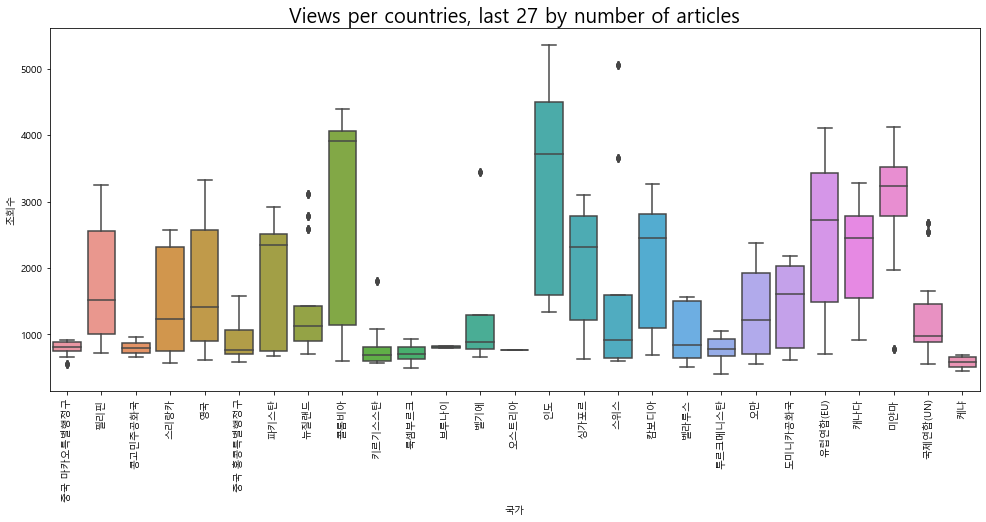

In [33]:
list_many_art = list(noa.iloc[:27,0])
df_temp = pd.DataFrame()
for each, row in df.iterrows():
    if row[1] in list_many_art:
        df['국가'] == row[1]
        df_1 = (df[df['국가'] == row[1]].iloc[:,[1,3,6]])
        df_temp = pd.concat([df_temp, df_1])


my_dpi = 120
plt.figure(figsize=(2000/my_dpi,800/my_dpi))
# boxplot
boxgraph = sns.boxplot(x='국가', y='조회수', data=df_temp)
plt.xticks(rotation=90)
# add stripplot
#boxgraph = sns.stripplot(x='국가', y='조회수', data=df_temp, color="orange", jitter=0.2, size=2.5)
# add a title
plt.title("Views per countries, last 27 by number of articles", fontsize=20)
plt.savefig('법제동향_조회수_lowest27.png',dpi=150)
plt.show()

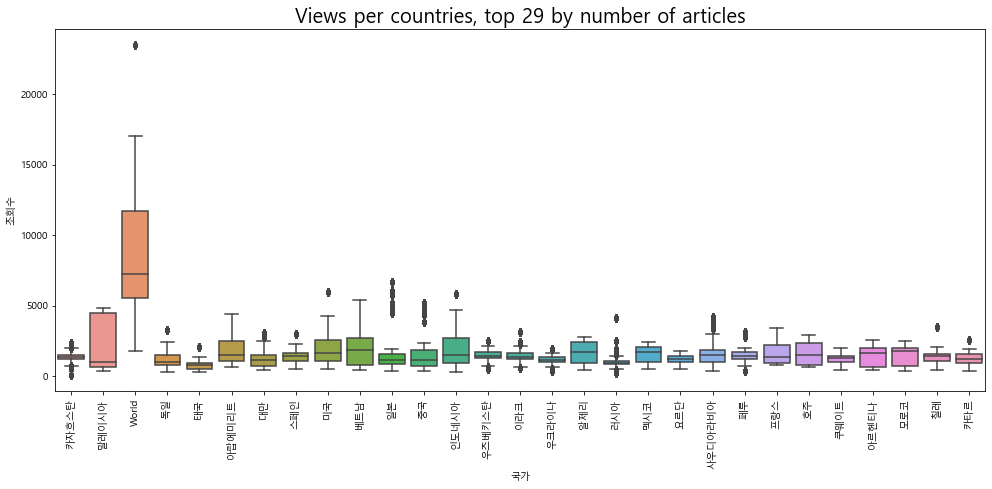

In [34]:
list_many_art = list(noa.iloc[-29:,0])
df_temp = pd.DataFrame()
for each, row in df.iterrows():
    if row[1] in list_many_art:
        df['국가'] == row[1]
        df_1 = (df[df['국가'] == row[1]].iloc[:,[1,3,6]])
        df_temp = pd.concat([df_temp, df_1])


my_dpi = 120
plt.figure(figsize=(2000/my_dpi,800/my_dpi))
# boxplot
boxgraph = sns.boxplot(x='국가', y='조회수', data=df_temp)
plt.xticks(rotation=90)
# add stripplot
#boxgraph = sns.stripplot(x='국가', y='조회수', data=df_temp, color="orange", jitter=0.2, size=2.5)
# add a title
plt.title("Views per countries, top 29 by number of articles", fontsize=20)
plt.savefig('법제동향_조회수_29.png',dpi=150)
plt.show()

# World 조회수 이상치 확인하기

In [13]:
df_viewhi_20000 = df.loc[df['조회수'] > 20000]
df_viewhi_world = df_viewhi_20000.loc[df_viewhi_20000['국가'] == 'World']
df_viewhi_world

,제목,국가,등록일자,조회수,본문내용,BoW,키워드10개
222,세계 각국의 “몰카” 범죄 처벌 규정,World,2019.04.30.,23458,각국의 입법 동향 세계 각국의 몰카 범죄 처벌 규정 201904 최근 몰래카메라...,"각국,입법,동향,세계,각국,몰카,범죄,처벌,몰래카메라,몰카,이용,범죄,보도,우리나라...","촬영,행위,몰래카메라,징역,벌금,처벌,범죄,신체부위,유로한화,유포"


### 일본 조회수가 4000 이상인 article, 중국 조회수가 3000 이상인 article이 이상치로 표현됨. 확인하기.

In [14]:
df_viewhi = df.loc[df['조회수'] > 3000]
df_viewhi_jp = df_viewhi.loc[df_viewhi['국가'] == '일본']
df_viewhi_jp

,제목,국가,등록일자,조회수,본문내용,BoW,키워드10개
901,일본 한부모가정 에 대한 지원 확대,일본,2012.10.29.,6698,일본 입법동향 일본 한부모가정 에 대한 지원 확대 2012 9 2012년 9월 ...,"일본,입법동향,일본,한부모가정,지원,일본,국회,한부모,가정,부모,채용,지원,법률,제...","한부모,한부모가정,일본,가정,빈곤,지원,부모,대책,편모가정,편부"
1094,제2회 아시아법제포럼 본회의 자료(일본 내각법제국 차장 인사말씀),일본,2012.07.11.,5177,제2회 아시아법제포럼 본회의 자료일본 내각법제국 차장 인사말씀 입니다 자세한 내용...,"아시아법제포럼,본회,자료일본,내각법제국,차장,인사말씀,첨부,감사","자료일본,내각법제국,차장,아시아법제포럼,인사말씀,본회,감사,첨부"
1132,동일본 대지진 피해자 원조 특별법(지진특례법) 제정,일본,2012.06.11.,5726,일본 입법동향 2012년 3월 23일 동일본 대지진 피해자 원조에 있어 일본 사법...,"일본,입법동향,동일본,피해자,원조,일본,사법지원센터,특례,법률지진특례법,제정,개요,...","동일본,변호사사법서사,원조,사법지원센터,법률지진특례법,사고피해,법률상담,피해자,대지..."
1265,일본의 지진조사연구추진본부,일본,2012.04.05.,4577,일본의 지진조사연구추진본부에 관한 자료입니다,"일본,지진조사연구추진본부,자료","지진조사연구추진본부,자료,일본"
1402,"환경성, 미나마타병 피해자 구제법 신청 마감",일본,2012.02.02.,5041,일본 입법동향 환경성 미나마타병 피해자 구제법 신청 마감 2012 2 2 환경...,"일본,입법동향,환경성,미나마타병,피해자,구제법,신청,마감,환경성,국내기준,미나마타병...","환경성,미나마타병,마감,피해자,구제법,신청,구제,반발,국내기준,일시금등"
1488,일본 내각법제국 개관,일본,2011.12.08.,5063,일본 내각법제국 개관 영문본입니다 본 자료는 법제처가 주최한 제1회 아시아 법제포...,"일본,내각법제국,개관,영문본,자료,법제처,주최,아시아,법제포럼,유용,활용하시","내각법제국,개관,법제포럼,영문본,활용하시,유용,아시아,법제처,주최,자료"
1634,부흥청 설치 법안 개요,일본,2011.10.04.,4826,일본 입법동향 부흥청 설치 법안 개요 2011 10 4 정부가 동일본 대지진으로부...,"일본,입법동향,부흥청,설치,법안,개요,정부,동일본,대지진,회복,임시,국회,제출,목표...","부흥,부흥청,부흥국,시읍면,설치,부흥방침,개요,법안가칭,통괄,전임각료"
1657,일본 정부 공통번호 식별 부여 법안 재고,일본,2011.09.26.,4489,일본 입법동향 일본 정부 공통번호 식별 부여 법안 재고 2011 9 26 정부...,"일본,입법동향,일본,정부,공통번호,식별,법안,재고,정부,사회보장서비스,조세,이행,국...","공통번호,유리벽,당초,정기국회,목표,개인정보,성립,내년,사회보장서비스,각인"
1795,원자력 손해배상 지원기구 법안 의결,일본,2011.08.04.,4598,일본 입법동향 원자력 손해배상 지원기구 법안 의결 헤세이23년2011년 8월 ...,"일본,입법동향,원자력,손해배상,지원기구,법안,의결,참의원,본회의,개최,동일본,복구,...","지원기구,원자력손해배상지원기구,특별위원회장,특별위원회,의안,동일본,손해배상,복구,원..."
1941,일본 선거 1표의 격차 위헌 판결,일본,2011.06.16.,6078,일본 판례동향 일본 최고재판소 2011년 3월 23일 선거 1표의 격차 위헌 판...,"일본,판례동향,일본,최고재판소,선거,격차,위헌,판결,일본,최고재판소,대법정,시행,중...","격차,최고재판소,투표가치,위헌,판결,합헌,선거,중의원,합리성,선거구"


In [15]:
df_viewhi_cn = df_viewhi.loc[df_viewhi['국가'] == '중국']
df_viewhi_cn

,제목,국가,등록일자,조회수,본문내용,BoW,키워드10개
1095,제2회 아시아법제포럼 본회의 자료(중국 법제판공실 부주임 인사말씀),중국,2012.07.11.,4429,제2회 아시아법제포럼 본회의 자료중국 법제판공실 부주임 인사말씀 입니다 자세한 내...,"아시아법제포럼,본회,자료중국,법제판공실,부주,인사말씀,첨부,감사","자료중국,부주,법제판공실,아시아법제포럼,인사말씀,본회,감사,첨부"
1156,중국특색사회주의 법률체계(중문본/영문본),중국,2012.06.01.,4984,중국 특색 사회주의 법률체계 자료 입니다 첨부 중국특색사회주의 법률체계중문본 ...,"중국,특색,사회주의,법률체계,자료,첨부,중국특색사회주,법률체계중문본,중국특색사회주,...","중국특색사회주,법률체계중문본,법률체계영문본,법률체계,특색,사회주의,첨부,자료,중국"
1157,"한,중 FTA학술세미나 자료집",중국,2012.06.01.,4956,한중 FTA학술세미나 자료집 입니다 자세한 내용은 첨부파일을 확인해 주세요 감사합니다,"학술세미나,자료집,감사","학술세미나,자료집,감사"
1179,사례로 풀어보는 중국법,중국,2012.05.22.,4777,사례로 풀어보는 중국법 출처 주중국대한민국대사관 입니다 자세한 내용은 첨부 파일을...,"사례,중국법","중국법,사례"
1180,중국부동산 분쟁사례집,중국,2012.05.22.,4353,중국부동산 분쟁사례집출처 주중국대한민국대사관입니다 자세한 내용은 첨부 파일을 확인...,"중국부동산,분쟁사례집출처,주중국대한민국대사관입니다,첨부,감사","중국부동산,분쟁사례집출처,주중국대한민국대사관입니다,감사,첨부"
1463,중국은 유럽연합과 중국어-영어 번역기계 특허 협정체결,중국,2011.12.22.,5182,중국 입법동향 중국은 유럽연합과 중국어영어 번역기계 특허 협정체결 2011 12 ...,"중국,입법동향,중국,유럽연합,중국어영어,번역기계,특허,협정체결,중국,지식재산부Sta...","중국어영어,양기관,번역,특허,중국,기계,유럽연합,번역기계,지식재산부State,유럽특..."
1492,중국 입법절차 개관,중국,2011.12.08.,4321,중국 입법절차 개관 영문본입니다 본 자료는 법제처가 주최한 제1회 아시아 법제포럼...,"중국,입법절차,개관,영문본,자료,법제처,주최,아시아,법제포럼,유용,활용하시","개관,법제포럼,입법절차,영문본,활용하시,유용,아시아,법제처,주최,자료"
1605,중국-베트남간 해양문제 협약 체결,중국,2011.10.18.,3869,중국 입법동향 중국베트남 간 해양문제 협약 체결 2011 10 12 중국은 베...,"중국,입법동향,중국베트남,해양문제,협약,체결,중국,베트남,양국,해양,해결,가이드라인...","해양문제,해양,양국,협약,중국베트남,해결,가이드라인,협정,협력,중국"


# view table with the first two keywords

In [16]:
df_cor = df.iloc[:,[1,3,6]]
first_words = []
second_words = []
for i, row in df_cor.iterrows():
    first_words.append(row[2].split(',')[0])
    second_words.append(row[2].split(',')[1])
        
df_cor['first keyword'] = first_words
df_cor['second keyword'] = second_words
df_cor

C:\Users\user\AppData\Local\Temp\ipykernel_3656\2395640920.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cor['first keyword'] = first_words
C:\Users\user\AppData\Local\Temp\ipykernel_3656\2395640920.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cor['second keyword'] = second_words


,국가,조회수,키워드10개,first keyword,second keyword
0,카자흐스탄,95,"최저임금,인상,텡게한화,카자흐스탄,조마르트,토카예프,연례연설,텡게,초빙,기초사회보장기준",최저임금,인상
1,말레이시아,342,"고용법,연기,시행,사라바난,인적자원부,유연근무제,국면,법정근로시간,출산휴가,왕실",고용법,연기
2,중국 마카오특별행정구,887,"마카오,원숭이두창,강제신고,영업중단,카지노,전염병,사진,지정,법제동향",마카오,원숭이두창
3,World,1797,"미만,형사미성년자,범죄,아동,연령,소년,미성년자,형사책임능력,저촉,소년법",미만,형사미성년자
4,독일,1194,"합병,형태변경,소액주주,조직재편,초월,국내법,주식,주식회사,국경,유럽",합병,형태변경
...,...,...,...,...,...
1995,멕시코,1832,"이주법,이주,여건,멕시코,이노호사Felipe,로스,피노스Los,별개,결과물,민간단체",이주법,이주
1996,우즈베키스탄,1648,"택시,노선,번호,차량,우즈베키스탄,승객,강제,ТАХI,앞문,운송회사",택시,노선
1997,우즈베키스탄,1518,"부동산업,부동산,최저급여액,물건,면허,자본금,정관,컨설팅,종사,수탁",부동산업,부동산
1998,우즈베키스탄,1457,"벨라루스,우즈베키스탄,운송,자동차,국제,허가서,쿼터,운송량,협력,교역",벨라루스,우즈베키스탄


In [17]:
df_cor.sort_values('조회수', ascending=False)

,국가,조회수,키워드10개,first keyword,second keyword
222,World,23458,"촬영,행위,몰래카메라,징역,벌금,처벌,범죄,신체부위,유로한화,유포",촬영,행위
250,World,17031,"아동,학대,아동학대,가해자,미성년자,부모,친권,징역,가정폭력,최대",아동,학대
195,World,13389,"마약,투약,각성제,징역,최대,불법,벌금,제조,단속법,사형",마약,투약
115,World,12800,"낙태,임신,태아,징역,모체,임신중절,의사,임신부,허용,벌금",낙태,임신
140,World,11711,"음란물,징역,유포,아동,아동청소년,제작,배포,포르노,아동포르노,아동음란물",음란물,징역
...,...,...,...,...,...
233,태국,284,"합작투자,민간,합작,투자법,정부,프로젝트,인프,태국,중점,사업",합작투자,민간
417,태국,283,"기름야자,야자유,농업협동조합부,야자유법,과학기술부,태국,사업자,수렴,기금,검토",기름야자,야자유
410,인도네시아,277,"인허가,경제정책,패키지,통합인허가시스템,사업,인도네시아,지방정부,도모,활용,다르민",인허가,경제정책
412,러시아,218,"목재,유라시아,가구,목공제품,특별투자계약,조달,회원국,정부조달,경제연합,러시아",목재,유라시아


## 트리맵 데이터분석

In [18]:
#!pip install squarify

In [19]:
#import squarify

#plt.figure(figsize=(12, 10))

# 빈도값을 0~1까지 값을 갖도록 min-max 표준화
#norm = mpl.colors.Normalize(vmin=min(top_nouns.values()),
                            #vmax=max(top_nouns.values()))

# 정규화된 값을 matplotlib의 cm(color map)에서 Blue 에 적용
#colors = [mpl.cm.Blues(norm(value)) for value in top_nouns.values()]

# squarify 플랏생성(label 단어, 박스 크기는 빈도, 색깔르 cm.Blue, 투명도는 30%
#squarify.plot(label=top_nouns.keys(),
              #sizes=top_nouns.values(),
              #color=colors,
              #alpha=.7)

# T-검정, 분산분석, FP growth algorithm, two-way anova

### Apriori Algorithm

In [30]:
# Create a unique dataset
def createS(stringset):
    s1 = []
    s2 = []
    for string in stringset:
        for i in string.split(','):
            s1.append(i)
        s2.append(s1)
    s2.sort()
    print(s2)
    #return map(frozenset, s2)
    return s2

In [27]:
class node:
    def __init__(self, word, word_count=0, parent=None, link=None):
        self.word=word
        self.word_count=word_count
        self.parent=parent
        self.link=link
        self.children={}

#tree traversal
    def visittree(self):
#        if self is None:
#            return None
        output=[]
        output.append(str(vocabdic[self.word]) + " " +str(self.word_count))
        if len(list(self.children.keys()))>0:
            for i in (list(self.children.keys())):
                output.append(self.children[i].visittree())
        return output
  
              
'''      Build FPTREE class and method       '''        
class fptree:
    def __init__(self, data, minsup=400):
        #raw data and minminual support
        self.data=data
        self.minsup=minsup
        
        #null root
        self.root= node(word="Null", word_count=1)
        
        #each line of transaction with new order from the most frequent items to less
        self.wordlinesort=[]
        #node table containing link of all nodes of same word
        self.nodetable=[]
        #dictionary contaiing word more than the minsupport count with des order
        self.wordsortdic=[]
       
        #dictionaly containing word and the support count        
        self.worddic={}
        #dictionary with word and it's postion of the support count rank
        self.wordorderdic={}
#        
#        self.preprocess(data)
#        #first scan to build all the necessay dictionary
        self.construct(data)
        #second scan and build fp tree line  by line            
    def construct(self, data):
                #get support count for all word
        for tran in data:
            for words in tran:
                if words in self.worddic.keys():
                    self.worddic[words]+=1
                else:
                    self.worddic[words]=1
        wordlist = list(self.worddic.keys())
        #prune all the world with < min support count
        for word in wordlist:
            if(self.worddic[word]<self.minsup):
                del self.worddic[word]
        #sort the remaing items des, with first word count than work#id        
        self.wordsortdic = sorted(self.worddic.items(), key=lambda x: (-x[1],x[0])) 
        #create a table containing word, wordcount and all link node of that word
        t=0
        for i in self.wordsortdic:
            word = i[0]
            wordc = i[1]
            self.wordorderdic[word]=t
            t+=1
            wordinfo = {'wordn':word, 'wordcc':wordc, 'linknode': None}
            self.nodetable.append(wordinfo)
        #construct fptree line by line
    
        for line in data:
            supword=[]
            for word in line:
                #only keep words with support count higher than minsupport
                if word in self.worddic.keys():
                    supword.append(word)
           #insert words to the fp tree
            if len(supword)>0:
                #reorder the words 
                sortsupword = sorted(supword, key = lambda k: self.wordorderdic[k])
                self.wordlinesort.append(sortsupword)
                #enter the word one by one from begining
                R = self.root
#                print(sortsupword)
                for i in sortsupword:                  
                    if i in R.children.keys():
                        R.children[i].word_count +=1
                        R=R.children[i]
                    else:

                        R.children[i] = node(word=i,word_count=1,parent=R,link=None)
                        R=R.children[i]
                        # link this node to nodetable
                        for wordinfo in self.nodetable:
                            if wordinfo["wordn"] == R.word:
                                # find the last node of the  node linklist
                                if wordinfo["linknode"] is None:
                                    wordinfo["linknode"] = R
                                else:
                                    iter_node = wordinfo["linknode"]
                                    while(iter_node.link is not None):
                                        iter_node = iter_node.link
                                    iter_node.link = R

# create transactions for conditinal tree   
    def condtreetran(self,N):
        if N.parent is None:
            return None
        
        condtreeline =[]
        #starting from the leaf node reverse add word till hit root
        while N is not None:
            line=[]
            PN = N.parent
            while PN.parent is not None:
                line.append(PN.word)
                PN=PN.parent
            #reverse order the transaction
            line = line[::-1]
            for i in range(N.word_count):
                condtreeline.append(line)   
            #move on to next linknode
            N=N.link
        return condtreeline
    
#Find frequent word list by creating conditional tree
    def findfqt(self,parentnode=None):
        if len(list(self.root.children.keys()))==0:
            return None
        result=[]
        sup=self.minsup
        #starting from the end of nodetable
        revtable = self.nodetable[::-1]
        for n in revtable:
            fqset=[set(),0]
            if(parentnode==None):      
                fqset[0]={n['wordn'],}
            else:
                fqset[0] = {n['wordn']}.union(parentnode[0])
            fqset[1]=n['wordcc']
            result.append(fqset)
            condtran = self.condtreetran(n['linknode'])
            #recursively build the conditinal fp tree
            contree= fptree(condtran,sup)
            conwords = contree.findfqt(fqset)
            if conwords is not None:
                for words in conwords:
                    result.append(words)
        return result

#check if tree hight is larger than 1 
    def checkheight(self):
        if len(list(self.root.children.keys()))==0:
            return False
        else:
            return True
          
          
min_sup=4

test_data = [['I1','I2','I5'],
             ['I2','I4'],
             ['I2','I3'],
             ['I1','I2','I4'],
             ['I1','I3'],
             ['I2','I3'],
             ['I1','I3'],
             ['I1','I2','I3','I5'],
             ['I1','I2','I3']]



fp_tree = fptree(test_data, min_sup) #create FP tree on data

print ("\n========== Printing Frequent Word Set on " + i +" ==========")
frequentwordset = fp_tree.findfqt() #mining frequent patt
frequentwordset=sorted(frequentwordset,key = lambda k: -k[1] )


#print frequent patt
for word in frequentwordset:
    count = (str(word[1])+"\t")
    words =''
    for val in word[0]:
        words+= (str(vocabdic[val])+" ")
    print(count+words)


#print conditional fp tree height >1
for i in fp_tree.nodetable[::-1]:
    lines = fp_tree.condtreetran(i['linknode'])
    condtree = fptree(lines,min_sup)
    if(condtree.checkheight()):
        print('Condtional FPTree Root on '+(vocabdic[i['wordn']]))
        print(condtree.root.visittree())

TypeError: can only concatenate str (not "int") to str

In [31]:
dataset = createS(df_cor.iloc[:,2])
print(dataset)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

